In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#EDA

In [3]:
df.drop('customerID', axis='columns', inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/z3/q314db697q95drwc43vlwz040000gp/T/ipykernel_86968/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


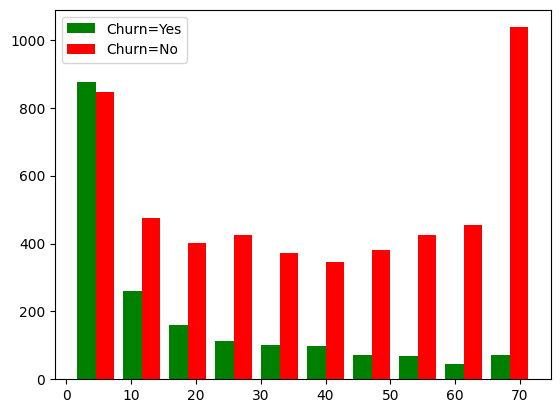

In [10]:
#How many loyal customers are leaving -> histogram

tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

#Early Customers are more likely to churn 

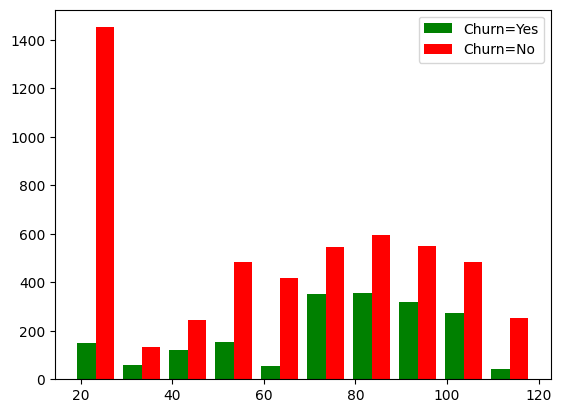

In [11]:
#Monthly Charges

mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [12]:
#Text to numbers
#    
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

/var/folders/z3/q314db697q95drwc43vlwz040000gp/T/ipykernel_86968/673599592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
/var/folders/z3/q314db697q95drwc43vlwz040000gp/T/ipykernel_86968/673599592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)
/var/folders/z3/q314db697q95drwc43vlwz040000gp/T/ipykernel_86968/673599592.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace m

In [14]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [15]:
df1.gender.replace({"Female": 1, "Male": 0}, inplace=True)

/var/folders/z3/q314db697q95drwc43vlwz040000gp/T/ipykernel_86968/2978492491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.gender.replace({"Female": 1, "Male": 0}, inplace=True)
/var/folders/z3/q314db697q95drwc43vlwz040000gp/T/ipykernel_86968/2978492491.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [16]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns 

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
print_unique_col_values(df2)

In [18]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [19]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [20]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
291,0,0,0,0,0.478873,1,0,1,1,1,...,True,False,False,False,True,False,False,False,False,True
6012,1,0,1,1,0.056338,1,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
6720,0,0,1,1,0.971831,1,1,0,1,1,...,True,False,False,False,False,True,False,False,True,False
1106,1,0,0,0,0.873239,1,1,0,1,0,...,False,True,False,False,False,True,True,False,False,False
1850,1,1,1,0,0.647887,1,1,1,1,1,...,True,False,False,True,False,False,False,True,False,False


In [21]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [23]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    # keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.6603 - loss: 0.5963
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.7846 - loss: 0.4454
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.7936 - loss: 0.4167
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7877 - loss: 0.4226
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.8026 - loss: 0.4177
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7971 - loss: 0.4143
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7965 - loss: 0.4148
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8095 - loss: 0.4091
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.7934 - loss: 0.4131
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.7995 - loss: 0.4144
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.8053 - loss: 0.4069
Epoch 12/100
176/176 ━━━━━━━━━━

In [24]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4366


[0.4532882869243622, 0.778251588344574]

In [25]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step


array([[0.16397572],
       [0.43504417],
       [0.013215  ],
       [0.6630049 ],
       [0.59914595]], dtype=float32)

In [26]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:5]

[0, 0, 0, 1, 1]

In [27]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.65      0.50      0.57       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

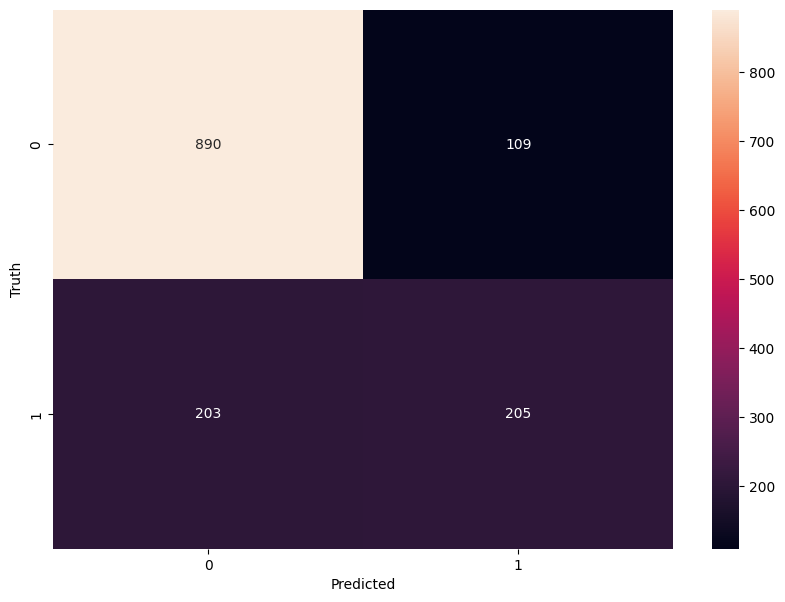

In [29]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

HANDLING IMBALANCED DATASET -> LOW F1 Scores

In [30]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(20, input_shape=(26,), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

Method 1 - Undersampling

In [31]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.4232 - loss: 0.7828
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.7784 - loss: 0.4716
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4289
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8099 - loss: 0.4077
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8021 - loss: 0.4158
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.8117 - loss: 0.4025
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.7985 - loss: 0.4191
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.8188 - loss: 0.4040
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.8063 - loss: 0.4178
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.8059 - loss: 0.4080
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8131 - loss: 0.4039
Epoch 12/100
176/176 ━━━━━━━━━━━━

In [32]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)

In [33]:
df_test_under =  pd.concat([df_class_0_under, df_class_1], axis=0)

In [34]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.5550 - loss: 0.7032
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7522 - loss: 0.5518
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7561 - loss: 0.5103
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.7831 - loss: 0.4799
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7765 - loss: 0.4807
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.7712 - loss: 0.4843
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.7830 - loss: 0.4623
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.7755 - loss: 0.4823
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7710 - loss: 0.4826
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.7749 - loss: 0.4679
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.7774 - loss: 0.4622
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - a

Method 2 - Oversampling

In [36]:
count_class_0, count_class_1

(5163, 1869)

In [38]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [39]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [40]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.6529 - loss: 0.6217
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.7581 - loss: 0.5024
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7634 - loss: 0.4960
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.7635 - loss: 0.4847
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.7730 - loss: 0.4761
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7676 - loss: 0.4808
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.7717 - loss: 0.4710
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.7818 - loss: 0.4648
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7736 - loss: 0.4690
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.7786 - loss: 0.4647
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.7740 - loss: 0.4609
Epoch 12/100
259/259 ━━━━━━━━━━

Method 3 - SMOTE

In [41]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.6401 - loss: 0.6182
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.7785 - loss: 0.4774
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.7759 - loss: 0.4680
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.7773 - loss: 0.4622
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.7835 - loss: 0.4532
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.7837 - loss: 0.4508
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.7905 - loss: 0.4537
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7832 - loss: 0.4497
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.7966 - loss: 0.4342
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.7935 - loss: 0.4440
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.7943 - loss: 0.4389
Epoch 12/100
259/259 ━━━━━━━━━━

Method 4 - Use of Ensemble with undersampling

In [51]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [52]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [55]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [56]:
df3_class_0 = df3[df3['Churn'] == 0]
df3_class_1 = df3[df3['Churn'] == 1]

In [57]:
df3_class_0.shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [58]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train['Churn']

    return X_train, y_train

In [60]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5842 - loss: 0.6594
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7266 - loss: 0.5557
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7453 - loss: 0.5148  
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7641 - loss: 0.4950
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7617 - loss: 0.4983
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.7721 - loss: 0.4868
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.7744 - loss: 0.4777
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.7724 - loss: 0.4825
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.7748 - loss: 0.4749
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.7661 - loss: 0.4807
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7719 - loss: 0.4803
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accur

In [61]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4924 - loss: 0.7087
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7473 - loss: 0.5432
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7602 - loss: 0.4919
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7692 - loss: 0.4835 
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7565 - loss: 0.4928
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.7668 - loss: 0.4734
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.7598 - loss: 0.4843
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.7650 - loss: 0.4767
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7588 - loss: 0.4838
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.7627 - loss: 0.4740
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7692 - loss: 0.4628
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy

In [62]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.5651 - loss: 0.6638
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.7611 - loss: 0.5217
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.7511 - loss: 0.5050
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7684 - loss: 0.4893
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.7834 - loss: 0.4720
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.7715 - loss: 0.4854
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.7753 - loss: 0.4741
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7956 - loss: 0.4555
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.7727 - loss: 0.4779
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7825 - loss: 0.4656
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.7792 - loss: 0.4687
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step

In [63]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]

    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [64]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.72      0.74      1407

